<a href="https://colab.research.google.com/github/andrewng88/ml_from_scratch/blob/master/3_SVM_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# https://www.youtube.com/watch?v=efR1C6CvhmE ( youtube )
# http://web.mit.edu/6.034/wwwbob/svm-notes-long-08.pdf ( slides )
# https://www.svm-tutorial.com/2014/11/svm-understanding-math-part-1/ 
( detailed maths )

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

class SVM:

  def __init__(self, learning_rate=1e-3,lambda_param = 0.01, n_iters = 1000):
    self.lr = learning_rate
    self.lambda_param = lambda_param
    self.n_iters = n_iters
    self.w = None
    self.b = None

  def fit(self,X,y):
    n_samples, n_features = X.shape
    self.w = np.zeros(n_features)
    self.b = 0

    # converts less than 0 to -1 , otherwise 1
    y_ = np.where(y<=0, -1 , 1)
    
    # iterate the dataset over n_iters
    for _ in range(self.n_iters):
      for idx, x_i in enumerate(X):
        
        # if condition is True , >=1
        condition = y_[idx] * ( np.dot(x_i,self.w) - self.b ) >=1  
        if condition:
          dJ = 2*self.lambda_param * self.w

        else:
          dJ = 2*self.lambda_param * self.w - np.dot(y_[idx],x_i)
          db = y_[idx]
         
        self.w -= self.lr * dJ
        self.b -= self.lr * db
  
  def predict(self,X):
    linear_output = np.dot(X,self.w) - self.b 
    # https://numpy.org/doc/stable/reference/generated/numpy.sign.html
    # similar to ReLU
    return np.sign(linear_output)

[0.32737806 0.36840921] -1.7339999999999198


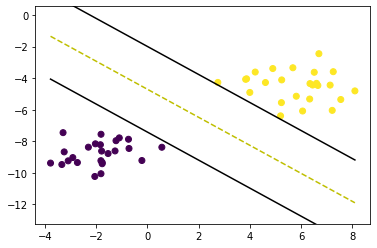

In [2]:
X, y =  datasets.make_blobs(n_samples=50, n_features=2, centers=2, cluster_std=1.05, random_state=40)
y = np.where(y == 0, -1, 1)

clf = SVM()
clf.fit(X, y)
#predictions = clf.predict(X)
 
print(clf.w, clf.b)

def visualize_svm():
     def get_hyperplane_value(x, w, b, offset):
          return (-w[0] * x + b + offset) / w[1]

     fig = plt.figure()
     ax = fig.add_subplot(1,1,1)
     plt.scatter(X[:,0], X[:,1], marker='o',c=y)

     x0_1 = np.amin(X[:,0])
     x0_2 = np.amax(X[:,0])

     x1_1 = get_hyperplane_value(x0_1, clf.w, clf.b, 0)
     x1_2 = get_hyperplane_value(x0_2, clf.w, clf.b, 0)

     x1_1_m = get_hyperplane_value(x0_1, clf.w, clf.b, -1)
     x1_2_m = get_hyperplane_value(x0_2, clf.w, clf.b, -1)

     x1_1_p = get_hyperplane_value(x0_1, clf.w, clf.b, 1)
     x1_2_p = get_hyperplane_value(x0_2, clf.w, clf.b, 1)

     ax.plot([x0_1, x0_2],[x1_1, x1_2], 'y--')
     ax.plot([x0_1, x0_2],[x1_1_m, x1_2_m], 'k')
     ax.plot([x0_1, x0_2],[x1_1_p, x1_2_p], 'k')

     x1_min = np.amin(X[:,1])
     x1_max = np.amax(X[:,1])
     ax.set_ylim([x1_min-3,x1_max+3])

     plt.show()

visualize_svm()